In [ ]:
import zipfile
import networkx as nx
import os
import pandas as pd
import matplotlib.pyplot as plt
import random

In [ ]:
zip_file_path = r"C:\Users\daisy\Downloads\temporalcossim.zip"
extract_path = r"C:\Users\daisy\Downloads\temporalcossim"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
gexf_files = [
    os.path.join(extract_path, "temporalcossim", "day1_network", "day1_network_graph.gexf"),
    os.path.join(extract_path, "temporalcossim", "day2_network", "day2_network_graph.gexf"),
    os.path.join(extract_path, "temporalcossim", "day3_network", "day3_network_graph.gexf")
]

In [ ]:
# Dictionary to store NetworkX graphs
graphs = {}

# Load each .gexf file into a NetworkX graph
for gexf_file in gexf_files:
    graph_name = os.path.basename(gexf_file).replace(".gexf", "")
    try:
        # Read the GEXF file into a NetworkX graph
        graph = nx.read_gexf(gexf_file, node_type=str)
        # Store the graph in the dictionary
        graphs[graph_name] = graph
        print(f"Loaded {graph_name} successfully.")
    except Exception as e:
        print(f"Error reading {gexf_file}: {e}")

for name, graph in graphs.items():
    print(f"\nGraph: {name}")
    print(f"Number of nodes: {graph.number_of_nodes()}")
    print(f"Number of edges: {graph.number_of_edges()}")
    print(f"Node labels: {list(graph.nodes())[:5]}...")  # Display first 5 node labels as a sample
    print(f"Edge weights (sample): {list(graph.edges(data=True))[:5]}")  # Display first 5 edges with data

Loaded day1_network_graph successfully.
Loaded day2_network_graph successfully.
Loaded day3_network_graph successfully.

Graph: day1_network_graph
Number of nodes: 9
Number of edges: 36
Node labels: ['theepochtimes', 'reuters', 'nytimes', 'cnn', 'foxnews']...
Edge weights (sample): [('theepochtimes', 'reuters', {'id': '0', 'weight': 0.44}), ('theepochtimes', 'nytimes', {'id': '1', 'weight': 0.45}), ('theepochtimes', 'cnn', {'id': '2', 'weight': 0.3066666666666666}), ('theepochtimes', 'foxnews', {'id': '3', 'weight': 0.5429999999999999}), ('theepochtimes', 'thefederalist', {'id': '4', 'weight': 0.0666666666666666})]

Graph: day2_network_graph
Number of nodes: 9
Number of edges: 36
Node labels: ['theepochtimes', 'reuters', 'nytimes', 'cnn', 'foxnews']...
Edge weights (sample): [('theepochtimes', 'reuters', {'id': '0', 'weight': 0.4314814814814815}), ('theepochtimes', 'nytimes', {'id': '1', 'weight': 0.4833333333333333}), ('theepochtimes', 'cnn', {'id': '2', 'weight': 0.4592592592592592})

In [14]:
multi_layer_graph = nx.Graph()

# Add nodes and edges from each graph as separate layers
for name, graph in graphs.items():
    # Add nodes with layer information
    for node in graph.nodes():
        multi_layer_graph.add_node((node, name))

    # Add edges within the same layer (from the original graph)
    for u, v, data in graph.edges(data=True):
        multi_layer_graph.add_edge((u, name), (v, name), weight=data.get('weight', 1))

# Connect nodes with the same label across different layers
node_labels = list(graphs.values())[0].nodes()  # Using node labels from any graph (as they are identical)
for node_label in node_labels:
    layers = list(graphs.keys())
    for i in range(len(layers) - 1):
        # Add inter-layer edges between corresponding nodes in adjacent layers
        multi_layer_graph.add_edge((node_label, layers[i]), (node_label, layers[i + 1]))
multi_layer_info = {
    "number_of_nodes": multi_layer_graph.number_of_nodes(),
    "number_of_edges": multi_layer_graph.number_of_edges(),
    "sample_edges": list(multi_layer_graph.edges(data=True))[:50]  # Display a sample of 5 edges
}

multi_layer_info

{'number_of_nodes': 27,
 'number_of_edges': 120,
 'sample_edges': [(('theepochtimes', 'day1_network_graph'),
   ('reuters', 'day1_network_graph'),
   {'weight': 0.44}),
  (('theepochtimes', 'day1_network_graph'),
   ('nytimes', 'day1_network_graph'),
   {'weight': 0.45}),
  (('theepochtimes', 'day1_network_graph'),
   ('cnn', 'day1_network_graph'),
   {'weight': 0.3066666666666666}),
  (('theepochtimes', 'day1_network_graph'),
   ('foxnews', 'day1_network_graph'),
   {'weight': 0.5429999999999999}),
  (('theepochtimes', 'day1_network_graph'),
   ('thefederalist', 'day1_network_graph'),
   {'weight': 0.0666666666666666}),
  (('theepochtimes', 'day1_network_graph'),
   ('washingtontimes', 'day1_network_graph'),
   {'weight': 0.4626666666666666}),
  (('theepochtimes', 'day1_network_graph'),
   ('latimes', 'day1_network_graph'),
   {'weight': 0.4283333333333333}),
  (('theepochtimes', 'day1_network_graph'),
   ('washingtonpost', 'day1_network_graph'),
   {'weight': 0.3433333333333334}),
  

In [15]:
# List of CSV file paths
file_paths = [
    r"C:\Users\daisy\Downloads\liberal_jan_6.csv",
    r"C:\Users\daisy\Downloads\liberal_jan_7.csv",
    r"C:\Users\daisy\Downloads\liberal_jan_8.csv",
    r"C:\Users\daisy\Downloads\conservative_jan_6.csv",
    r"C:\Users\daisy\Downloads\conservative_jan_7.csv",
    r"C:\Users\daisy\Downloads\conservative_jan_8.csv",
    r"C:\Users\daisy\Downloads\politics_jan_6.csv",
    r"C:\Users\daisy\Downloads\politics_jan_7.csv",
    r"C:\Users\daisy\Downloads\politics_jan_8.csv",
    r"C:\Users\daisy\Downloads\libertarian_jan_6.csv",
    r"C:\Users\daisy\Downloads\libertarian_jan_7.csv",
    r"C:\Users\daisy\Downloads\libertarian_jan_8.csv",
    r"C:\Users\daisy\Downloads\democrats_jan_6.csv",
    r"C:\Users\daisy\Downloads\democrats_jan_7.csv",
    r"C:\Users\daisy\Downloads\democrats_jan_8.csv",
    r"C:\Users\daisy\Downloads\republican_jan_6.csv",
    r"C:\Users\daisy\Downloads\republican_jan_7.csv",
    r"C:\Users\daisy\Downloads\republican_jan_8.csv"
]

# Define dates and node labels
dates = ["jan_6", "jan_7", "jan_8"]
node_labels = ['theepochtimes', 'reuters', 'nytimes', 'cnn', 'foxnews', 'washingtontimes', 'latimes', 'washingtonpost', 'thefederalist']

multi_layer_graph = nx.Graph()
for file_path in file_paths:
    try:
        df = pd.read_csv(file_path)

        # Determine layer name from file path
        for date in dates:
            if date in file_path:
                layer_name = f"day{dates.index(date) + 1}_network_graph"
                break

        for _, row in df.iterrows():
            domain = row['domain']
            title = row['title']
            rel_score = row.get('rel_score', 1)

            for node_label in node_labels:
                if node_label in domain:
                    # Add edge between title and node label with weight
                    multi_layer_graph.add_edge(
                        (title, layer_name), (node_label, layer_name), weight=rel_score
                    )

        print(f"Processed: {file_path}")
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")

print("Multilayer Graph Info:")
print(f"Number of nodes: {multi_layer_graph.number_of_nodes()}")
print(f"Number of edges: {multi_layer_graph.number_of_edges()}")
print(f"Sample edges: {list(multi_layer_graph.edges(data=True))[:5]}")


Processed: C:\Users\daisy\Downloads\liberal_jan_6.csv
Processed: C:\Users\daisy\Downloads\liberal_jan_7.csv
Processed: C:\Users\daisy\Downloads\liberal_jan_8.csv
Processed: C:\Users\daisy\Downloads\conservative_jan_6.csv
Processed: C:\Users\daisy\Downloads\conservative_jan_7.csv
Processed: C:\Users\daisy\Downloads\conservative_jan_8.csv
Processed: C:\Users\daisy\Downloads\politics_jan_6.csv
Processed: C:\Users\daisy\Downloads\politics_jan_7.csv
Processed: C:\Users\daisy\Downloads\politics_jan_8.csv
Processed: C:\Users\daisy\Downloads\libertarian_jan_6.csv
Processed: C:\Users\daisy\Downloads\libertarian_jan_7.csv
Processed: C:\Users\daisy\Downloads\libertarian_jan_8.csv
Processed: C:\Users\daisy\Downloads\democrats_jan_6.csv
Processed: C:\Users\daisy\Downloads\democrats_jan_7.csv
Processed: C:\Users\daisy\Downloads\democrats_jan_8.csv
Processed: C:\Users\daisy\Downloads\republican_jan_6.csv
Processed: C:\Users\daisy\Downloads\republican_jan_7.csv
Processed: C:\Users\daisy\Downloads\repu

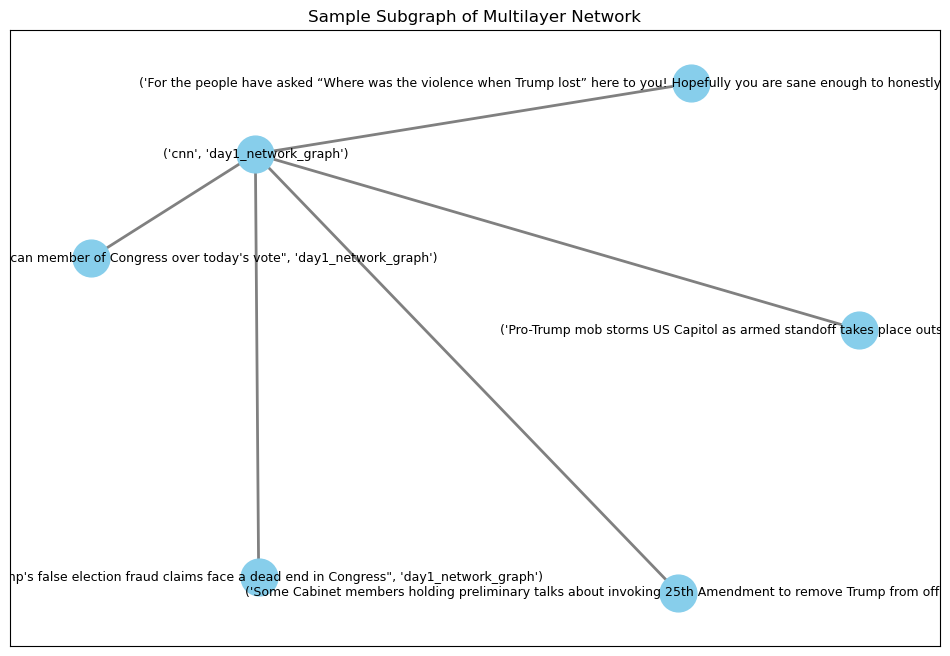

In [16]:
# Define a sample set of nodes for the subgraph
subgraph_nodes = [
    ("Eric Trump just threatened every Republican member of Congress over today's vote", 'day1_network_graph'),
    ('cnn', 'day1_network_graph'),
    ('Pro-Trump mob storms US Capitol as armed standoff takes place outside House chamber', 'day1_network_graph'),
    ('For the people have asked “Where was the violence when Trump lost” here to you! Hopefully you are sane enough to honestly re-examine yourselves', 'day1_network_graph'),
    ('Some Cabinet members holding preliminary talks about invoking 25th Amendment to remove Trump from office', 'day1_network_graph'),
    ("Trump's false election fraud claims face a dead end in Congress", 'day1_network_graph')
]

# subgraph for visualization
subgraph = multi_layer_graph.subgraph(subgraph_nodes)
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(subgraph)
nx.draw_networkx_nodes(subgraph, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_edges(subgraph, pos, width=2, edge_color='gray')
nx.draw_networkx_labels(subgraph, pos, font_size=9, font_family='sans-serif')
plt.title("Sample Subgraph of Multilayer Network")
plt.show()


In [17]:
# Extract the layer names from the nodes of the multilayer graph
layer_names = {node[1] for node in multi_layer_graph.nodes()}

# Display the unique layer names
print("Unique layers in the multilayer graph:", layer_names)

# Check if there are 3 layers
if len(layer_names) == 3:
    print("The multilayer graph has 3 layers:", layer_names)
else:
    print(f"The multilayer graph has {len(layer_names)} layers:", layer_names)


Unique layers in the multilayer graph: {'day3_network_graph', 'day1_network_graph', 'day2_network_graph'}
The multilayer graph has 3 layers: {'day3_network_graph', 'day1_network_graph', 'day2_network_graph'}


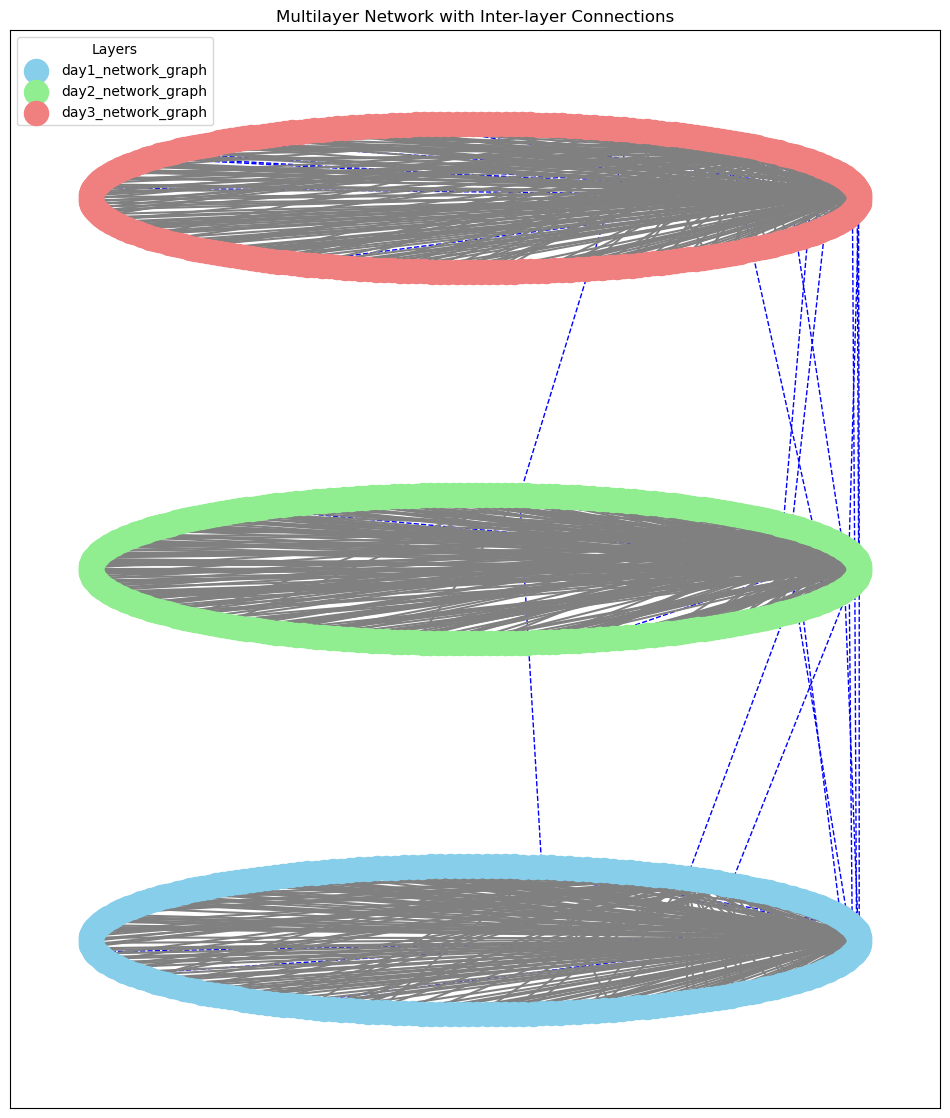

In [20]:
# Define colors for each layer
layer_colors = {
    'day1_network_graph': 'skyblue',
    'day2_network_graph': 'lightgreen',
    'day3_network_graph': 'lightcoral'
}

# Node labels to consider for inter-layer connections
node_labels = ['theepochtimes', 'reuters', 'nytimes', 'cnn', 'foxnews', 'washingtontimes', 'latimes', 'washingtonpost', 'thefederalist']

# Add inter-layer edges with weight 0
for node_label in node_labels:
    # Connect between day1 and day2
    multi_layer_graph.add_edge(
        (node_label, 'day1_network_graph'), (node_label, 'day2_network_graph'), weight=0
    )
    # Connect between day2 and day3
    multi_layer_graph.add_edge(
        (node_label, 'day2_network_graph'), (node_label, 'day3_network_graph'), weight=0
    )

pos = {}
layers = ['day1_network_graph', 'day2_network_graph', 'day3_network_graph']
for i, layer in enumerate(layers):
    # Get nodes for the current layer
    layer_nodes = [node for node in multi_layer_graph.nodes() if node[1] == layer]
    # layer_pos = nx.circular_layout(layer_nodes)
    # for node, coords in layer_pos.items():
    #     pos[node] = (coords[0], coords[1] + i * 5)
# # Set up the plot
# plt.figure(figsize=(12, 14))
# for layer in layers:
#     layer_nodes = [node for node in multi_layer_graph.nodes() if node[1] == layer]
#     nx.draw_networkx_nodes(multi_layer_graph, pos, nodelist=layer_nodes,
#                            node_color=layer_colors[layer], node_size=300, label=layer)
# # Draw inter-layer edges with a different style (e.g., dashed lines)
# inter_layer_edges = [(u, v) for u, v, data in multi_layer_graph.edges(data=True) if data['weight'] == 0]
# nx.draw_networkx_edges(multi_layer_graph, pos, edgelist=inter_layer_edges, width=1, edge_color='blue', style='dashed')
# intra_layer_edges = [(u, v) for u, v, data in multi_layer_graph.edges(data=True) if data['weight'] != 0]
# nx.draw_networkx_edges(multi_layer_graph, pos, edgelist=intra_layer_edges, width=1.5, edge_color='gray')
# plt.legend(title="Layers", loc="upper left")
# plt.title("Multilayer Network with Inter-layer Connections")
# plt.show()


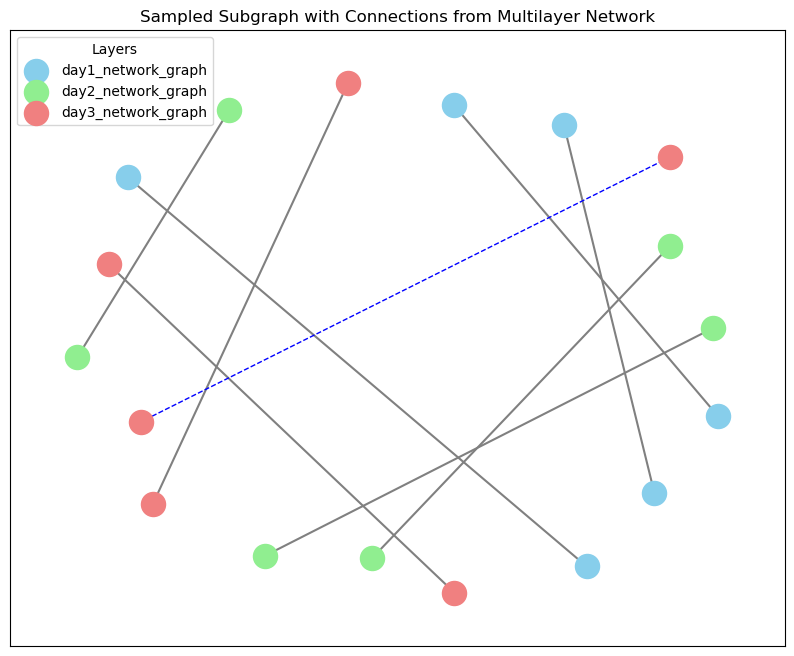

In [22]:
# Sample 3 nodes per layer and include their direct connections
layers = ['day1_network_graph', 'day2_network_graph', 'day3_network_graph']
sampled_nodes = {}
subgraph_edges = []

for layer in layers:
    # Get all nodes in the current layer
    layer_nodes = [node for node in multi_layer_graph.nodes() if node[1] == layer]
    
    # Randomly sample 3 nodes from the layer
    sampled_nodes[layer] = random.sample(layer_nodes, min(3, len(layer_nodes)))
    
    # Include all edges involving the sampled nodes within the same layer
    for node in sampled_nodes[layer]:
        for neighbor in multi_layer_graph.neighbors(node):
            if neighbor in layer_nodes:  # Ensure the edge is within the same layer
                subgraph_edges.append((node, neighbor, multi_layer_graph.get_edge_data(node, neighbor)))

# Create a list of subgraph nodes (flattened) and inter-layer edges
subgraph_nodes = sum(sampled_nodes.values(), [])
for node_label in node_labels:
    for i in range(len(layers) - 1):
        u = (node_label, layers[i])
        v = (node_label, layers[i + 1])
        if u in subgraph_nodes and v in subgraph_nodes:
            subgraph_edges.append((u, v, {'weight': 0}))

# Create the subgraph with sampled nodes and edges
subgraph = nx.Graph()
subgraph.add_nodes_from(subgraph_nodes)
subgraph.add_edges_from(subgraph_edges)

pos = nx.spring_layout(subgraph)
plt.figure(figsize=(10, 8))
for layer in layers:
    layer_nodes = [node for node in subgraph.nodes() if node[1] == layer]
    nx.draw_networkx_nodes(subgraph, pos, nodelist=layer_nodes,
                           node_color=layer_colors[layer], node_size=300, label=layer)
intra_layer_edges = [(u, v) for u, v, data in subgraph.edges(data=True) if data['weight'] != 0]
nx.draw_networkx_edges(subgraph, pos, edgelist=intra_layer_edges, width=1.5, edge_color='gray')
inter_layer_edges = [(u, v) for u, v, data in subgraph.edges(data=True) if data['weight'] == 0]
nx.draw_networkx_edges(subgraph, pos, edgelist=inter_layer_edges, width=1, edge_color='blue', style='dashed')

plt.legend(title="Layers", loc="upper left")
plt.title("Sampled Subgraph with Connections from Multilayer Network")
plt.show()


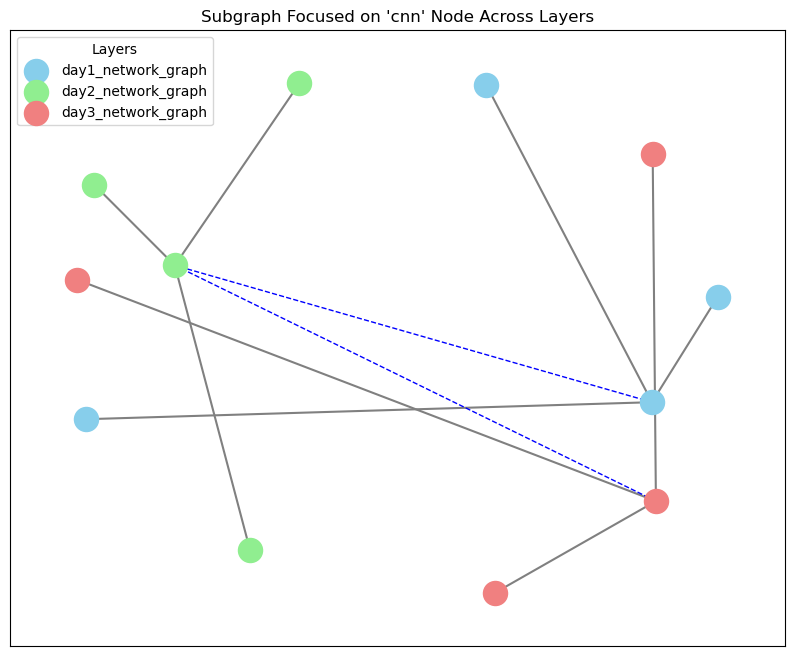

In [23]:
# Focus node for visualization
focus_node = 'cnn'

# Collect nodes and edges for each layer
layers = ['day1_network_graph', 'day2_network_graph', 'day3_network_graph']
subgraph_nodes = []
subgraph_edges = []

for layer in layers:
    focus_layer_node = (focus_node, layer)
    
    # Check if the focus node exists in this layer
    if focus_layer_node in multi_layer_graph:
        # Get all neighbors of the focus node in this layer
        neighbors = list(multi_layer_graph.neighbors(focus_layer_node))
        
        # Sample 3 neighbors (or take all if less than 3)
        sampled_neighbors = random.sample(neighbors, min(3, len(neighbors)))
        
        # Add the focus node and sampled neighbors to subgraph nodes
        subgraph_nodes.append(focus_layer_node)
        subgraph_nodes.extend(sampled_neighbors)
        
        # Add edges between the focus node and sampled neighbors
        for neighbor in sampled_neighbors:
            edge_data = multi_layer_graph.get_edge_data(focus_layer_node, neighbor)
            subgraph_edges.append((focus_layer_node, neighbor, edge_data))

# Add inter-layer edges between 'cnn' nodes across layers
for i in range(len(layers) - 1):
    u = (focus_node, layers[i])
    v = (focus_node, layers[i + 1])
    if u in subgraph_nodes and v in subgraph_nodes:
        subgraph_edges.append((u, v, {'weight': 0}))

subgraph = nx.Graph()
subgraph.add_nodes_from(subgraph_nodes)
subgraph.add_edges_from(subgraph_edges)

# a layout for the subgraph
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(10, 8))

# Draw nodes and edges for each layer
for layer in layers:
    layer_nodes = [node for node in subgraph.nodes() if node[1] == layer]
    nx.draw_networkx_nodes(subgraph, pos, nodelist=layer_nodes,
                           node_color=layer_colors[layer], node_size=300, label=layer)

# Draw intra-layer edges (gray lines)
intra_layer_edges = [(u, v) for u, v, data in subgraph.edges(data=True) if data['weight'] != 0]
nx.draw_networkx_edges(subgraph, pos, edgelist=intra_layer_edges, width=1.5, edge_color='gray')

# Draw inter-layer edges (dashed blue lines)
inter_layer_edges = [(u, v) for u, v, data in subgraph.edges(data=True) if data['weight'] == 0]
nx.draw_networkx_edges(subgraph, pos, edgelist=inter_layer_edges, width=1, edge_color='blue', style='dashed')
plt.legend(title="Layers", loc="upper left")
plt.title("Subgraph Focused on 'cnn' Node Across Layers")
plt.show()


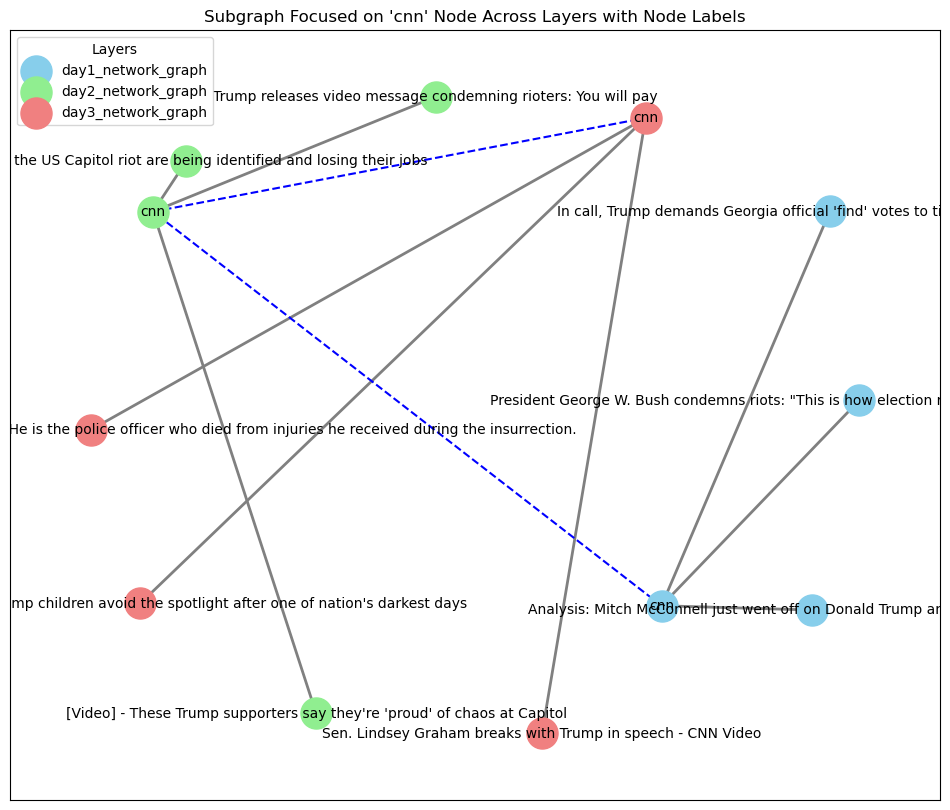

In [24]:
# Focus node for visualization
focus_node = 'cnn'

# Collect nodes and edges for each layer
layers = ['day1_network_graph', 'day2_network_graph', 'day3_network_graph']
subgraph_nodes = []
subgraph_edges = []

for layer in layers:
    focus_layer_node = (focus_node, layer)
    
    # Check if the focus node exists in this layer
    if focus_layer_node in multi_layer_graph:
        # Get all neighbors of the focus node in this layer
        neighbors = list(multi_layer_graph.neighbors(focus_layer_node))
        
        # Sample 3 neighbors (or take all if less than 3)
        sampled_neighbors = random.sample(neighbors, min(3, len(neighbors)))
        
        # Add the focus node and sampled neighbors to subgraph nodes
        subgraph_nodes.append(focus_layer_node)
        subgraph_nodes.extend(sampled_neighbors)
        
        # Add edges between the focus node and sampled neighbors
        for neighbor in sampled_neighbors:
            edge_data = multi_layer_graph.get_edge_data(focus_layer_node, neighbor)
            subgraph_edges.append((focus_layer_node, neighbor, edge_data))

# Add inter-layer edges between 'cnn' nodes across layers
for i in range(len(layers) - 1):
    u = (focus_node, layers[i])
    v = (focus_node, layers[i + 1])
    if u in subgraph_nodes and v in subgraph_nodes:
        subgraph_edges.append((u, v, {'weight': 0}))

# Create the subgraph
subgraph = nx.Graph()
subgraph.add_nodes_from(subgraph_nodes)
subgraph.add_edges_from(subgraph_edges)
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(12, 10))

# Draw nodes and edges for each layer
for layer in layers:
    layer_nodes = [node for node in subgraph.nodes() if node[1] == layer]
    nx.draw_networkx_nodes(subgraph, pos, nodelist=layer_nodes,
                           node_color=layer_colors[layer], node_size=500, label=layer)

# Draw intra-layer edges (gray lines)
intra_layer_edges = [(u, v) for u, v, data in subgraph.edges(data=True) if data['weight'] != 0]
nx.draw_networkx_edges(subgraph, pos, edgelist=intra_layer_edges, width=2, edge_color='gray')

# Draw inter-layer edges (dashed blue lines)
inter_layer_edges = [(u, v) for u, v, data in subgraph.edges(data=True) if data['weight'] == 0]
nx.draw_networkx_edges(subgraph, pos, edgelist=inter_layer_edges, width=1.5, edge_color='blue', style='dashed')
labels = {node: node[0] for node in subgraph.nodes()}  # Use the node label (e.g., 'cnn')
nx.draw_networkx_labels(subgraph, pos, labels, font_size=10, font_family='sans-serif')
plt.legend(title="Layers", loc="upper left")
plt.title("Subgraph Focused on 'cnn' Node Across Layers with Node Labels")
plt.show()

In [25]:
file_paths = [
    r"C:\Users\daisy\Downloads\liberal_jan_6.csv",
    r"C:\Users\daisy\Downloads\liberal_jan_7.csv",
    r"C:\Users\daisy\Downloads\liberal_jan_8.csv",
    r"C:\Users\daisy\Downloads\conservative_jan_6.csv",
    r"C:\Users\daisy\Downloads\conservative_jan_7.csv",
    r"C:\Users\daisy\Downloads\conservative_jan_8.csv",
    r"C:\Users\daisy\Downloads\politics_jan_6.csv",
    r"C:\Users\daisy\Downloads\politics_jan_7.csv",
    r"C:\Users\daisy\Downloads\politics_jan_8.csv",
    r"C:\Users\daisy\Downloads\libertarian_jan_6.csv",
    r"C:\Users\daisy\Downloads\libertarian_jan_7.csv",
    r"C:\Users\daisy\Downloads\libertarian_jan_8.csv",
    r"C:\Users\daisy\Downloads\democrats_jan_6.csv",
    r"C:\Users\daisy\Downloads\democrats_jan_7.csv",
    r"C:\Users\daisy\Downloads\democrats_jan_8.csv",
    r"C:\Users\daisy\Downloads\republican_jan_6.csv",
    r"C:\Users\daisy\Downloads\republican_jan_7.csv",
    r"C:\Users\daisy\Downloads\republican_jan_8.csv"
]

dates = ["jan_6", "jan_7", "jan_8"]
node_labels = ['theepochtimes', 'reuters', 'nytimes', 'cnn', 'foxnews', 'washingtontimes', 'latimes', 'washingtonpost', 'thefederalist']
multi_layer_graph = nx.Graph()
for file_path in file_paths:
    try:
        df = pd.read_csv(file_path)
        csv_name = os.path.basename(file_path).replace(".csv", "")
        for date in dates:
            if date in file_path:
                layer_name = f"day{dates.index(date) + 1}_network_graph"
                break
        for _, row in df.iterrows():
            domain = row['domain']
            title = row['title']
            rel_score = row.get('rel_score', 1)
            title_node = f"{title} | {csv_name}"
            for node_label in node_labels:
                if node_label in domain:
                    multi_layer_graph.add_edge(
                        (title_node, layer_name), (node_label, layer_name), weight=rel_score
                    )

        print(f"Processed: {file_path}")
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
print("Multilayer Graph Info:")
print(f"Number of nodes: {multi_layer_graph.number_of_nodes()}")
print(f"Number of edges: {multi_layer_graph.number_of_edges()}")
print(f"Sample edges: {list(multi_layer_graph.edges(data=True))[:5]}")


Processed: C:\Users\daisy\Downloads\liberal_jan_6.csv
Processed: C:\Users\daisy\Downloads\liberal_jan_7.csv
Processed: C:\Users\daisy\Downloads\liberal_jan_8.csv
Processed: C:\Users\daisy\Downloads\conservative_jan_6.csv
Processed: C:\Users\daisy\Downloads\conservative_jan_7.csv
Processed: C:\Users\daisy\Downloads\conservative_jan_8.csv
Processed: C:\Users\daisy\Downloads\politics_jan_6.csv
Processed: C:\Users\daisy\Downloads\politics_jan_7.csv
Processed: C:\Users\daisy\Downloads\politics_jan_8.csv
Processed: C:\Users\daisy\Downloads\libertarian_jan_6.csv
Processed: C:\Users\daisy\Downloads\libertarian_jan_7.csv
Processed: C:\Users\daisy\Downloads\libertarian_jan_8.csv
Processed: C:\Users\daisy\Downloads\democrats_jan_6.csv
Processed: C:\Users\daisy\Downloads\democrats_jan_7.csv
Processed: C:\Users\daisy\Downloads\democrats_jan_8.csv
Processed: C:\Users\daisy\Downloads\republican_jan_6.csv
Processed: C:\Users\daisy\Downloads\republican_jan_7.csv
Processed: C:\Users\daisy\Downloads\repu

In [26]:
file_paths = [
    r"C:\Users\daisy\Downloads\liberal_jan_6.csv",
    r"C:\Users\daisy\Downloads\liberal_jan_7.csv",
    r"C:\Users\daisy\Downloads\liberal_jan_8.csv",
    r"C:\Users\daisy\Downloads\conservative_jan_6.csv",
    r"C:\Users\daisy\Downloads\conservative_jan_7.csv",
    r"C:\Users\daisy\Downloads\conservative_jan_8.csv",
    r"C:\Users\daisy\Downloads\politics_jan_6.csv",
    r"C:\Users\daisy\Downloads\politics_jan_7.csv",
    r"C:\Users\daisy\Downloads\politics_jan_8.csv",
    r"C:\Users\daisy\Downloads\libertarian_jan_6.csv",
    r"C:\Users\daisy\Downloads\libertarian_jan_7.csv",
    r"C:\Users\daisy\Downloads\libertarian_jan_8.csv",
    r"C:\Users\daisy\Downloads\democrats_jan_6.csv",
    r"C:\Users\daisy\Downloads\democrats_jan_7.csv",
    r"C:\Users\daisy\Downloads\democrats_jan_8.csv",
    r"C:\Users\daisy\Downloads\republican_jan_6.csv",
    r"C:\Users\daisy\Downloads\republican_jan_7.csv",
    r"C:\Users\daisy\Downloads\republican_jan_8.csv"
]

# Define dates and node labels
dates = ["jan_6", "jan_7", "jan_8"]
node_labels = ['theepochtimes', 'reuters', 'nytimes', 'cnn', 'foxnews', 'washingtontimes', 'latimes', 'washingtonpost', 'thefederalist']

# Initialize multilayer graph
multi_layer_graph = nx.Graph()

# Iterate through each CSV and add edges to the graph
for file_path in file_paths:
    try:
        df = pd.read_csv(file_path)
        csv_name = os.path.basename(file_path).replace(".csv", "")
        for date in dates:
            if date in file_path:
                layer_name = f"day{dates.index(date) + 1}_network_graph"
                break
        for _, row in df.iterrows():
            domain = row['domain']
            title = row['title']
            rel_score = row.get('rel_score', 1)
            title_node = f"{title} | {csv_name}"
            for node_label in node_labels:
                if node_label in domain:
                    # Add edge between the modified title node and the node label with weight
                    multi_layer_graph.add_edge(
                        (title_node, layer_name), (node_label, layer_name), weight=rel_score
                    )

        print(f"Processed: {file_path}")
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")

# Add inter-layer edges between nodes with the same label across layers
for node_label in node_labels:
    u = (node_label, 'day1_network_graph')
    v = (node_label, 'day2_network_graph')
    if u in multi_layer_graph and v in multi_layer_graph:
        multi_layer_graph.add_edge(u, v, weight=0)
    u = (node_label, 'day2_network_graph')
    v = (node_label, 'day3_network_graph')
    if u in multi_layer_graph and v in multi_layer_graph:
        multi_layer_graph.add_edge(u, v, weight=0)
print("Multilayer Graph Info with Inter-layer Connections:")
print(f"Number of nodes: {multi_layer_graph.number_of_nodes()}")
print(f"Number of edges: {multi_layer_graph.number_of_edges()}")
print(f"Sample edges: {list(multi_layer_graph.edges(data=True))[:5]}")


Processed: C:\Users\daisy\Downloads\liberal_jan_6.csv
Processed: C:\Users\daisy\Downloads\liberal_jan_7.csv
Processed: C:\Users\daisy\Downloads\liberal_jan_8.csv
Processed: C:\Users\daisy\Downloads\conservative_jan_6.csv
Processed: C:\Users\daisy\Downloads\conservative_jan_7.csv
Processed: C:\Users\daisy\Downloads\conservative_jan_8.csv
Processed: C:\Users\daisy\Downloads\politics_jan_6.csv
Processed: C:\Users\daisy\Downloads\politics_jan_7.csv
Processed: C:\Users\daisy\Downloads\politics_jan_8.csv
Processed: C:\Users\daisy\Downloads\libertarian_jan_6.csv
Processed: C:\Users\daisy\Downloads\libertarian_jan_7.csv
Processed: C:\Users\daisy\Downloads\libertarian_jan_8.csv
Processed: C:\Users\daisy\Downloads\democrats_jan_6.csv
Processed: C:\Users\daisy\Downloads\democrats_jan_7.csv
Processed: C:\Users\daisy\Downloads\democrats_jan_8.csv
Processed: C:\Users\daisy\Downloads\republican_jan_6.csv
Processed: C:\Users\daisy\Downloads\republican_jan_7.csv
Processed: C:\Users\daisy\Downloads\repu

In [ ]:
layer_colors = {
    'day1_network_graph': 'skyblue',
    'day2_network_graph': 'lightgreen',
    'day3_network_graph': 'lightcoral'
}
focus_node = 'cnn'
subgraph_nodes = []
subgraph_edges = []
layers = ['day1_network_graph', 'day2_network_graph', 'day3_network_graph']
for layer in layers:
    focus_layer_node = (focus_node, layer)
    
    # Check if the focus node exists in this layer
    if focus_layer_node in multi_layer_graph:
        # Get all neighbors of the focus node in this layer
        neighbors = list(multi_layer_graph.neighbors(focus_layer_node))
        
        # Sample 3 neighbors (or take all if less than 3)
        sampled_neighbors = random.sample(neighbors, min(2, len(neighbors)))
        subgraph_nodes.append(focus_layer_node)
        subgraph_nodes.extend(sampled_neighbors)
        for neighbor in sampled_neighbors:
            edge_data = multi_layer_graph.get_edge_data(focus_layer_node, neighbor)
            subgraph_edges.append((focus_layer_node, neighbor, edge_data))

# Add inter-layer edges between 'cnn' nodes across layers with weight 0
for i in range(len(layers) - 1):
    u = (focus_node, layers[i])
    v = (focus_node, layers[i + 1])
    if u in subgraph_nodes and v in subgraph_nodes:
        subgraph_edges.append((u, v, {'weight': 0}))

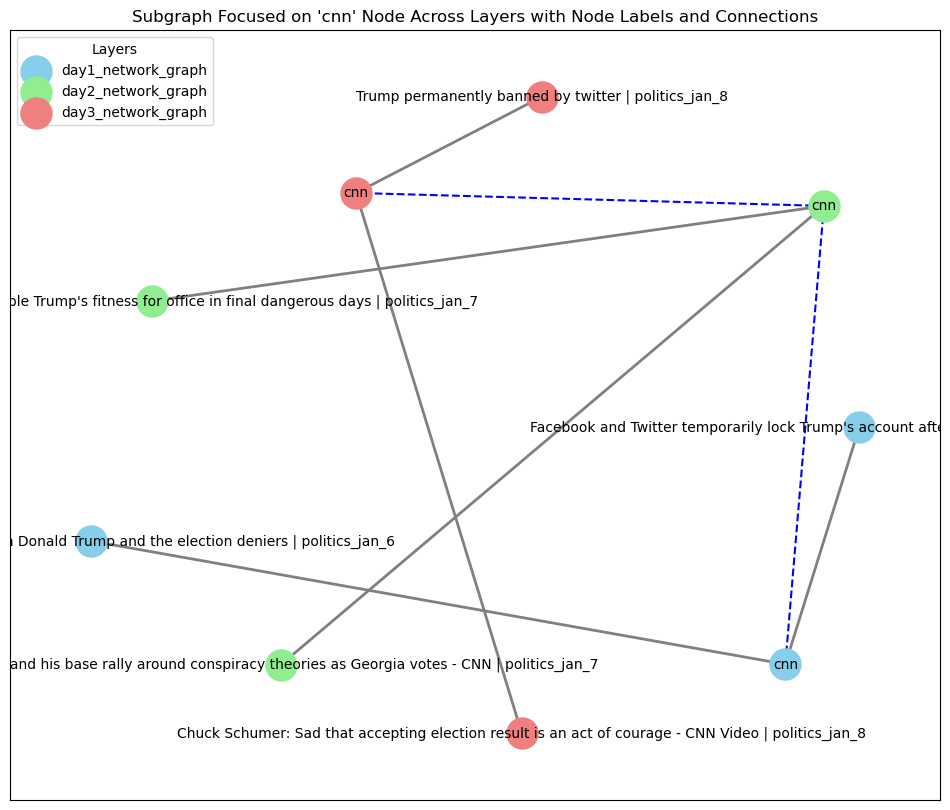

In [ ]:
subgraph = nx.Graph()
subgraph.add_nodes_from(subgraph_nodes)
subgraph.add_edges_from(subgraph_edges)
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(12, 10))

# Draw nodes and edges for each layer
for layer in layers:
    layer_nodes = [node for node in subgraph.nodes() if node[1] == layer]
    nx.draw_networkx_nodes(subgraph, pos, nodelist=layer_nodes,
                           node_color=layer_colors[layer], node_size=500, label=layer)

# Draw intra-layer edges (gray lines)
intra_layer_edges = [(u, v) for u, v, data in subgraph.edges(data=True) if data['weight'] != 0]
nx.draw_networkx_edges(subgraph, pos, edgelist=intra_layer_edges, width=2, edge_color='gray')

# Draw inter-layer edges (dashed blue lines)
inter_layer_edges = [(u, v) for u, v, data in subgraph.edges(data=True) if data['weight'] == 0]
nx.draw_networkx_edges(subgraph, pos, edgelist=inter_layer_edges, width=1.5, edge_color='blue', style='dashed')
labels = {node: node[0] for node in subgraph.nodes()}  
nx.draw_networkx_labels(subgraph, pos, labels, font_size=10, font_family='sans-serif')

plt.legend(title="Layers", loc="upper left")
plt.title("Subgraph Focused on 'cnn' Node Across Layers with Node Labels and Connections")
plt.show()

0

In [31]:
output_dir = r"C:\Users\daisy\Downloads"
for name, graph in graphs.items():
    output_file_path = os.path.join(output_dir, f"{name}.gexf")
    try:
        # Write the graph to a GEXF file
        nx.write_gexf(graph, output_file_path)
        print(f"Exported {name} to {output_file_path}")
    except Exception as e:
        print(f"Error exporting {name}: {e}")


Exported day1_network_graph to C:\Users\daisy\Downloads\day1_network_graph.gexf
Exported day2_network_graph to C:\Users\daisy\Downloads\day2_network_graph.gexf
Exported day3_network_graph to C:\Users\daisy\Downloads\day3_network_graph.gexf


In [1]:
import os
notebook_path = os.path.abspath('')
print(f"This notebook is stored at: {notebook_path}")

This notebook is stored at: C:\Users\daisy\CODE
